In [1]:
# 데이터 구조
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib as mpl # 그래프옵션설정
import matplotlib.pyplot as plt
import seaborn as sns

# 한글(윈도우)
mpl.rc('font', family='Malgun Gothic')
# 그래프에서 음수값 나올 때, 깨지는 현상 방지 
mpl.rc('axes', unicode_minus=False) 

#### 1.데이터 로드 및 필요한 column 추출

In [2]:
Board = pd.read_excel('C:/Program Files/saltlux/프로젝트2차/2안_카셰어링데이터/Carsharing_data(탑승내역).xlsx')
Board.columns

C:\Users\user\AppData\Local\Temp/ipykernel_11224/1412415167.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  Board = pd.read_excel('C:/Program Files/saltlux/프로젝트2차/2안_카셰어링데이터/Carsharing_data(탑승내역).xlsx')


Index(['예약번호', '차종', '차량번호', '대여존', '단지구분', '단지유형', '차량연식', '등급', '아이디',
       '생년월일', '연령', '성별', '거주단지', '가입일시', '가입년월', '예약일시', '예약시작', '예약종료',
       'Year', 'Month', 'Day', 'Week', 'Date', '시작월', '시작주', '시작일', '시작시',
       '시작시분', '예약분', '예약시간 (시)', '예약상태', '사용시작', '사용종료', '종료요일', '예약대기시간 (시)',
       '이용시간 (시)', '시간요금', '이용거리', '총요금', '예약요금', '연장요금', '반납지연요금', '거리요금',
       '취소패널티', '수동결제금액', '원예약요금', '쿠폰', '쿠폰번호'],
      dtype='object')

In [3]:
k = list(['아이디','성별','예약상태'])
Board = Board[k]

In [4]:
Board.columns

Index(['아이디', '성별', '예약상태'], dtype='object')

In [5]:
Board

,아이디,성별,예약상태
0,jjy2837,남,취소
1,cholong119,여,취소
2,jjy2837,남,종료
3,youmi0217,여,종료
4,yunseo1115,여,종료
...,...,...,...
83078,2345zzzzzccc,남,예약
83079,jkyun21,남,예약
83080,drownboy,남,예약
83081,kindkgh,남,예약


In [6]:
Profile = pd.read_excel('C:/Program Files/saltlux/프로젝트2차/2안_카셰어링데이터/Carsharing_data(회원정보).xlsx')

In [7]:
b = list(['아이디','가입요일','가입년','가입월','가입주','ADDR'])
Profile = Profile[b]
Profile

,아이디,가입요일,가입년,가입월,가입주,ADDR
0,jjin85,1,2017,12,52,"서울특별시 송파구 백제고분로19길 30-9 (잠실동, 새서울하우스) 501호"
1,ataumuna,1,2017,12,52,서울특별시 성북구 인촌로7가길 56 (안암동2가) 103호
2,dbsgml7788,1,2017,12,52,경기도 고양시 덕양구 원흥동 669 삼송마을14단지아파트 14단지 1403 동106
3,1004dyddlf,1,2017,12,52,"대구광역시 북구 내곡로 15 (사수동, 대구금호엘에이치천년나무8단지) 802동809호"
4,sss908,1,2017,12,52,울산광역시 남구 야음동 564-4 우방유화아파트 101동 908호
...,...,...,...,...,...,...
24518,hyundongong,5,2013,9,37,광주광역시 광산구 신가동 아름마을휴먼시아2단지아파트 207-702 (퇴거)
24519,yoosh13,5,2013,9,37,인천광역시 남동구 논현동 A3블럭 소래휴먼시아 324동 702호
24520,sg5988,5,2013,9,37,경기도 성남시 분당구 삼평동 봇들마을6단지아파트 607동702호
24521,rlewis,5,2013,9,37,인천광역시 부평구 삼산2동 삼산타운주공아파트4단지 407동 1110호


#### 2.데이터 병합

In [8]:
df = pd.merge(Board,Profile ,on='아이디', how='outer')
df # (100371 ,8)

,아이디,성별,예약상태,가입요일,가입년,가입월,가입주,ADDR
0,jjy2837,남,취소,2.0,2013.0,11.0,48.0,서울특별시 강북구 번3동 주공아파트 206동 704호
1,jjy2837,남,종료,2.0,2013.0,11.0,48.0,서울특별시 강북구 번3동 주공아파트 206동 704호
2,jjy2837,남,종료,2.0,2013.0,11.0,48.0,서울특별시 강북구 번3동 주공아파트 206동 704호
3,jjy2837,남,종료,2.0,2013.0,11.0,48.0,서울특별시 강북구 번3동 주공아파트 206동 704호
4,jjy2837,남,종료,2.0,2013.0,11.0,48.0,서울특별시 강북구 번3동 주공아파트 206동 704호
...,...,...,...,...,...,...,...,...
100366,hyundongong,NaN,NaN,5.0,2013.0,9.0,37.0,광주광역시 광산구 신가동 아름마을휴먼시아2단지아파트 207-702 (퇴거)
100367,yoosh13,NaN,NaN,5.0,2013.0,9.0,37.0,인천광역시 남동구 논현동 A3블럭 소래휴먼시아 324동 702호
100368,sg5988,NaN,NaN,5.0,2013.0,9.0,37.0,경기도 성남시 분당구 삼평동 봇들마을6단지아파트 607동702호
100369,rlewis,NaN,NaN,5.0,2013.0,9.0,37.0,인천광역시 부평구 삼산2동 삼산타운주공아파트4단지 407동 1110호


#### 3.중복아이디 통합 -> 총 고객수 파악

In [9]:
df.drop_duplicates(['아이디'], inplace=True)

In [10]:
df # (24610, 8) 

,아이디,성별,예약상태,가입요일,가입년,가입월,가입주,ADDR
0,jjy2837,남,취소,2.0,2013.0,11.0,48.0,서울특별시 강북구 번3동 주공아파트 206동 704호
64,cholong119,여,취소,2.0,2015.0,6.0,25.0,서울특별시 노원구 월계2동 월계주공1단지아파트 107-516
69,youmi0217,여,종료,4.0,2014.0,3.0,12.0,인천광역시 남동구 앵고개로815번길 22 소래휴먼시아3단지321동201호
185,yunseo1115,여,종료,3.0,2016.0,12.0,52.0,"경기도 평택시 이충로 38 (이충동, 반지마을주공아파트) 103-1605"
198,campos2,여,종료,4.0,2016.0,10.0,41.0,"경기도 남양주시 순화궁로 382 (별내동, 별사랑마을2-2단지) 2202동2103호"
...,...,...,...,...,...,...,...,...
100366,hyundongong,NaN,NaN,5.0,2013.0,9.0,37.0,광주광역시 광산구 신가동 아름마을휴먼시아2단지아파트 207-702 (퇴거)
100367,yoosh13,NaN,NaN,5.0,2013.0,9.0,37.0,인천광역시 남동구 논현동 A3블럭 소래휴먼시아 324동 702호
100368,sg5988,NaN,NaN,5.0,2013.0,9.0,37.0,경기도 성남시 분당구 삼평동 봇들마을6단지아파트 607동702호
100369,rlewis,NaN,NaN,5.0,2013.0,9.0,37.0,인천광역시 부평구 삼산2동 삼산타운주공아파트4단지 407동 1110호


#### 4.가입요일 숫자 -> 해당요일로 변환

In [11]:
# df['가입요일'].sort_values(ascending=True)
df['가입요일']

92345    1.0
77869    1.0
94427    1.0
94428    1.0
94429    1.0
        ... 
83061    NaN
83063    NaN
83070    NaN
83071    NaN
83077    NaN
Name: 가입요일, Length: 24610, dtype: float64

In [12]:
df['가입요일'] = df['가입요일'].replace([1,2,3,4,5,6,7], ['월요일','화요일','수요일','목요일','금요일','토요일','일요일'])
df['가입요일'] 

0         화요일
64        화요일
69        목요일
185       수요일
198       목요일
         ... 
100366    금요일
100367    금요일
100368    금요일
100369    금요일
100370    목요일
Name: 가입요일, Length: 24610, dtype: object

#### 5. 결측치 확인

In [13]:
df.isnull().sum() # 가입요일,년,월,주, ADDR 결측치 중복

아이디         0
성별      17327
예약상태    17288
가입요일       87
가입년        87
가입월        87
가입주        87
ADDR       87
dtype: int64

In [14]:
df.dropna(subset=['가입요일','가입년','가입월','가입주','ADDR'], how='any', inplace=True)
df # (24523 , 8)  

,아이디,성별,예약상태,가입요일,가입년,가입월,가입주,ADDR
0,jjy2837,남,취소,화요일,2013.0,11.0,48.0,서울특별시 강북구 번3동 주공아파트 206동 704호
64,cholong119,여,취소,화요일,2015.0,6.0,25.0,서울특별시 노원구 월계2동 월계주공1단지아파트 107-516
69,youmi0217,여,종료,목요일,2014.0,3.0,12.0,인천광역시 남동구 앵고개로815번길 22 소래휴먼시아3단지321동201호
185,yunseo1115,여,종료,수요일,2016.0,12.0,52.0,"경기도 평택시 이충로 38 (이충동, 반지마을주공아파트) 103-1605"
198,campos2,여,종료,목요일,2016.0,10.0,41.0,"경기도 남양주시 순화궁로 382 (별내동, 별사랑마을2-2단지) 2202동2103호"
...,...,...,...,...,...,...,...,...
100366,hyundongong,NaN,NaN,금요일,2013.0,9.0,37.0,광주광역시 광산구 신가동 아름마을휴먼시아2단지아파트 207-702 (퇴거)
100367,yoosh13,NaN,NaN,금요일,2013.0,9.0,37.0,인천광역시 남동구 논현동 A3블럭 소래휴먼시아 324동 702호
100368,sg5988,NaN,NaN,금요일,2013.0,9.0,37.0,경기도 성남시 분당구 삼평동 봇들마을6단지아파트 607동702호
100369,rlewis,NaN,NaN,금요일,2013.0,9.0,37.0,인천광역시 부평구 삼산2동 삼산타운주공아파트4단지 407동 1110호


In [15]:
df.isnull().sum() # (성별, 예약상태 )결측치 처리 어떻게 해야하지??? 의견 부탁드려요 ㅠㅠ

아이디         0
성별      17288
예약상태    17288
가입요일        0
가입년         0
가입월         0
가입주         0
ADDR        0
dtype: int64

#### 6.가입년,	가입월,가입주 float -> int 변환

In [16]:
df[['가입년','가입월','가입주']] =df[['가입년','가입월','가입주']].applymap(int)
df[['가입년','가입월','가입주']]

,가입년,가입월,가입주
0,2013,11,48
99507,2013,11,47
99508,2013,11,47
99509,2013,11,47
99510,2013,11,47
...,...,...,...
85985,2017,7,29
85984,2017,7,29
85983,2017,7,29
85991,2017,7,29


#### 7.실제 서비스 이용 고객 확인

In [17]:
df['예약상태'].unique()

array(['취소', '종료', '세차', '정비', '이용중', '예약', nan], dtype=object)

In [18]:
customer = df[df['예약상태']!='취소']
customer

,아이디,성별,예약상태,가입요일,가입년,가입월,가입주,ADDR
69,youmi0217,여,종료,목요일,2014,3,12,인천광역시 남동구 앵고개로815번길 22 소래휴먼시아3단지321동201호
185,yunseo1115,여,종료,수요일,2016,12,52,"경기도 평택시 이충로 38 (이충동, 반지마을주공아파트) 103-1605"
198,campos2,여,종료,목요일,2016,10,41,"경기도 남양주시 순화궁로 382 (별내동, 별사랑마을2-2단지) 2202동2103호"
206,h2oks,남,종료,화요일,2015,12,51,경기도 부천시 소사구 괴안동 범박휴먼시아1단지아파트 113동801호
214,zack1218,여,종료,목요일,2014,8,33,인천광역시 남동구 앵고개로815번길 22 소래휴먼시아322동1303호
...,...,...,...,...,...,...,...,...
100366,hyundongong,NaN,NaN,금요일,2013,9,37,광주광역시 광산구 신가동 아름마을휴먼시아2단지아파트 207-702 (퇴거)
100367,yoosh13,NaN,NaN,금요일,2013,9,37,인천광역시 남동구 논현동 A3블럭 소래휴먼시아 324동 702호
100368,sg5988,NaN,NaN,금요일,2013,9,37,경기도 성남시 분당구 삼평동 봇들마을6단지아파트 607동702호
100369,rlewis,NaN,NaN,금요일,2013,9,37,인천광역시 부평구 삼산2동 삼산타운주공아파트4단지 407동 1110호


#### 8. 년도별 고객 확인

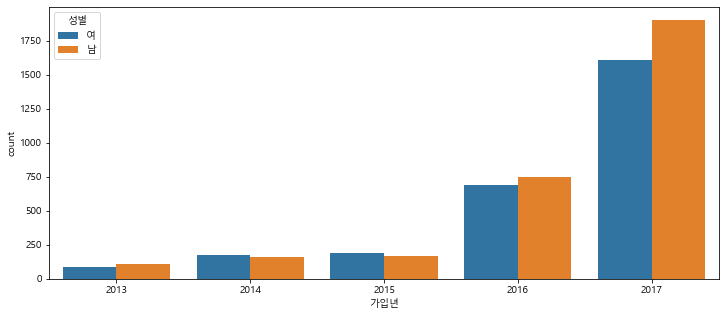

In [19]:
plt.figure(figsize= (12,5))

sns.countplot(data=customer, x= '가입년', hue='성별')
plt.show()

<AxesSubplot:xlabel='가입주', ylabel='Count'>

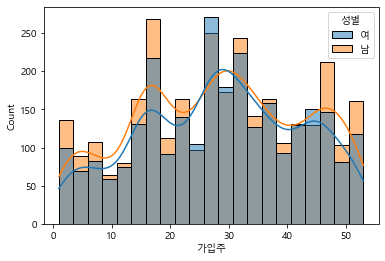

In [52]:
sns.histplot(data= customer, x='가입주', kde=True, hue='성별') 

<AxesSubplot:xlabel='가입요일', ylabel='Count'>

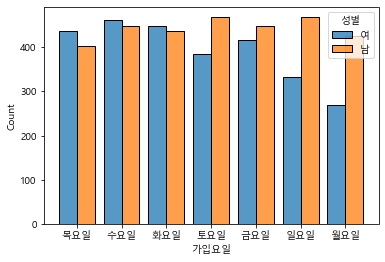

In [53]:
sns.histplot(data=customer, x="가입요일",hue="성별", multiple="dodge", shrink=.8)

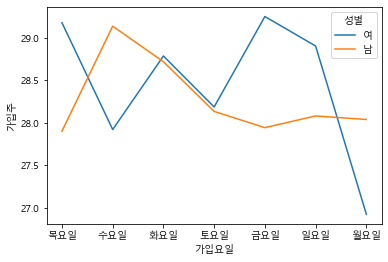

In [34]:
sns.lineplot(data=customer,x ='가입요일', y='가입주', ci=None, hue='성별' )
plt.show()